<a href="https://colab.research.google.com/github/Fathi146/P146216_STQD6324_DataManagement/blob/main/P146216_STQD6324_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This analysis examines Superstore’s sales performance over the period 2014–2017 to uncover key trends, seasonal patterns, and profitability insights across product categories. By leveraging time series decomposition and category-level analysis, the study aims to identify growth drivers, operational inefficiencies, and opportunities to improve profitability. The findings provide actionable recommendations to enhance business strategy, optimize resources, and sustain long-term growth in a competitive retail environment.

# **Data Loading**

Data Source
https://public.tableau.com/app/learn/sample-data

In [4]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
!pip install hdfs

from hdfs import InsecureClient
import pandas as pd

client = InsecureClient('http://1080:2222', user='maria_dev')

client.download('/user/maria_dev/superstore/superstore.xls', './superstore.xls', overwrite=True)

data = pd.read_excel('superstore.xls')

# **Data Cleaning**

In [7]:
#Checking the data
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [8]:
#Checking the data type
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
#Checking the data
data.describe()

Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00  90008.000000    209.940000     5.000000   
max              2018-01-05 00:00:00  99301.000000  22638.480000    14.000000   
std                              NaN  32063.693350    623.245101     2.225110   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.976000  
std       0.206452   234.260108

In [10]:
#Changing the date format for further cleaning
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
#Splitting the Month, Year and Day of the date for easier analysis
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [12]:
#Checking the changes
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Order Month  Order Year  Order Day of Week  
0     0.00   41.9136           11        2016                  1  
1     0.00  219.5820           11        2016                  1  
2     0.00    6.8714            6        2016                  6  
3     0.45 -383.0310           10        2015                  6  
4     0.20    2.5164           10        2015                  6  

[5 rows x 24 columns]

In [13]:
#Applying the date splitting to Ship date
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Day of Week'] = data['Ship Date'].dt.dayofweek

In [14]:
#Checking the changes
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...     Sales  \
0      Claire Gute   Consumer  United States        Henderson  ...  261.9600   
1      Claire Gute   Consumer  United States        Henderson  ...  731.9400   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   14.6200   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  957.5775   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   22.3680   

   Quantity Discount    Profit Order Month Order Year Order Day of Week  \
0         2     0.00   41.9136          11       2016                 1   
1         3     0.00  219.5820          11       2016                 1   
2         2     0.00    6.8714           6       2016                 6   
3         5     0.45 -383.0310          10       2015                 6   
4         2     0.20    2.5164          10       2015                 6   

   Ship Month  Ship Year  Ship Day of Week  
0          11       2016                 4  
1          11       2016                 4  
2           6       2016                 3  
3          10       2015                 6  
4          10       2015                 6  

[5 rows x 27 columns]

In [15]:
#Removing day columns as it does not seem necessary
data = data.drop(columns='Order Day of Week')
data = data.drop(columns='Ship Day of Week')

In [16]:
#Checking the changes
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Sub-Category                                       Product Name     Sales  \
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200   
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775   
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680   

  Quantity Discount    Profit Order Month  Order Year  Ship Month  Ship Year  
0        2     0.00   41.9136          11        2016          11       2016  
1        3     0.00  219.5820          11        2016          11       2016  
2        2     0.00    6.8714           6        2016           6       2016  
3        5     0.45 -383.0310          10        2015          10       2015  
4        2     0.20    2.5164          10        2015          10       2015  

[5 rows x 25 columns]

In [17]:
#Changing the data type from object to string for easier handling
data['Order ID'] = data['Order ID'].astype('string')
data['Ship Mode'] = data['Ship Mode'].astype('string')
data['Customer ID'] = data['Customer ID'].astype('string')
data['Customer Name'] = data['Customer Name'].astype('string')
data['Segment'] = data['Segment'].astype('string')
data['Country'] = data['Country'].astype('string')
data['City'] = data['City'].astype('string')
data['State'] = data['State'].astype('string')
data['Region'] = data['Region'].astype('string')
data['Product ID'] = data['Product ID'].astype('string')
data['Category'] = data['Category'].astype('string')
data['Sub-Category'] = data['Sub-Category'].astype('string')
data['Product Name'] = data['Product Name'].astype('string')

In [18]:
#Checking data types after changes
data.dtypes

Row ID                    int64
Order ID         string[python]
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order Month               int32
Order Year                int32
Ship Month                int32
Ship Year                 int32
dtype: object

In [19]:
#Checking for missing data
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Month      0
Order Year       0
Ship Month       0
Ship Year        0
dtype: int64

# **Data Visualization**

In [26]:
pd.set_option('display.max_columns', None)
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  Order Month  Order Year  Ship Month  Ship Year  
0      0.00   41.9136           11        2016          11       2016  
1      0.00  219.5820           11        2016          11       2016  
2      0.00    6.8714            6        2016           6       2016  
3      0.45 -383.0310           10        2015          10       2015  
4      0.20    2.5164           10        2015          10       2015

**Sales & Profit Analysis**

In [27]:
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
total_orders = data['Order ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009


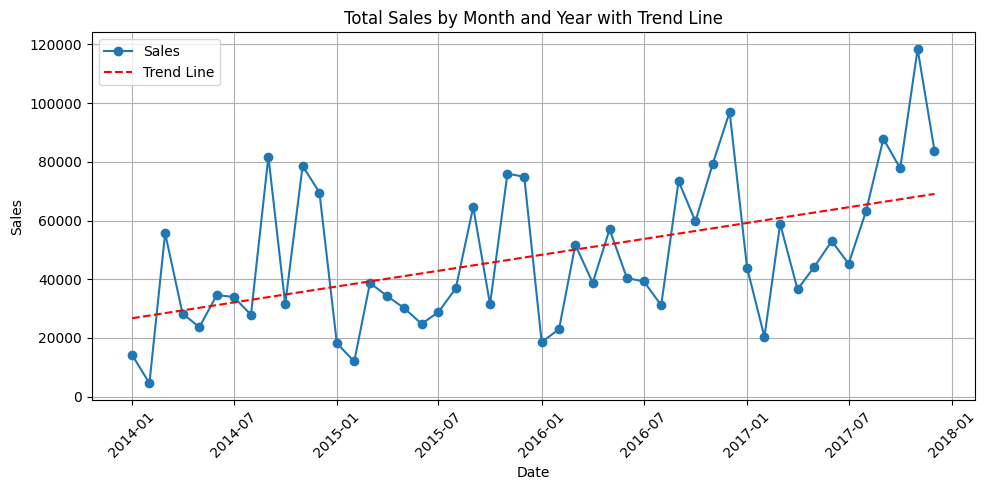

In [21]:
# Group by Year and Month, then Sum Sales
sales_by_month = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Create a Date for Plotting
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')

# Plot the time graph
plt.figure(figsize=(10, 5))
plt.plot(sales_by_month['Date'], sales_by_month['Sales'], marker='o', label='Sales')

# Calculate and plot the trend line
z = np.polyfit(sales_by_month['Date'].map(pd.Timestamp.toordinal), sales_by_month['Sales'], 1)
p = np.poly1d(z)
plt.plot(sales_by_month['Date'], p(sales_by_month['Date'].map(pd.Timestamp.toordinal)), color='red', linestyle='--', label='Trend Line')

# Customize the plot
plt.title('Total Sales by Month and Year with Trend Line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

**Insights**

The trend line has a clear upward slope, indicating that sales have been growing steadily over the years. This suggests healthy business growth and increasing customer demand. The actual monthly sales (blue line) show repeated peaks and troughs, suggesting seasonality. This pattern suggests customer behavior varies seasonally, likely tied to holidays, back-to-school, fiscal year-end purchases, or local festivities.

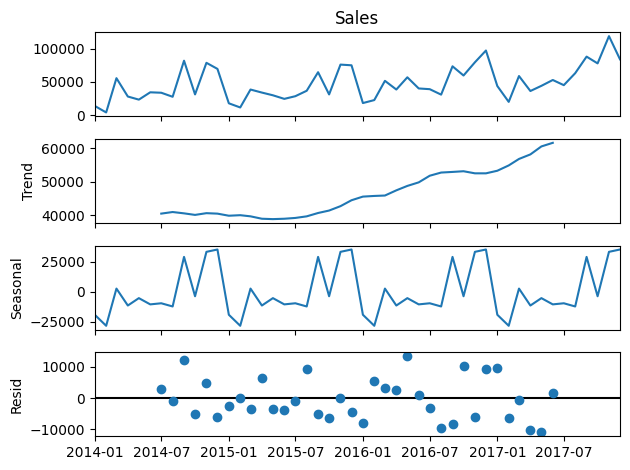

In [22]:
# Load package for decomposing time graph
from statsmodels.tsa.seasonal import seasonal_decompose

# Reformat date to fit the decomposition package
sales_by_month = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')
sales_by_month.set_index('Date', inplace=True)

# Decompose the time graph
result = seasonal_decompose(sales_by_month['Sales'], model='additive')

# Plot the Decomposed Components
result.plot()
plt.show()

**Insights**

The sales show noticeable ups and downs, but the overall level of sales is increasing over the 2014–2017 period.Peaks and dips are visible, suggesting seasonality.The trend component shows a clear, smooth upward curve starting around mid-2015 indicating that the business has experienced steady long-term growth in sales. The slope steepens slightly towards 2017 showing growth is accelerating, which is a good sign of market demand or improved operations.

The third panel shows seasonal trend. It shows similar pattern repeating every year. Peaks and troughs appear at regular intervals, some months consistently perform better than others. Seasonal amplitude (height of peaks) remains roughly the same over time — suggesting seasonality is stable year to year.Likely tied to holiday shopping seasons, year-end budgets, or promotions.

The last panel showing residuals. Residuals are the random noise left after removing trend and seasonality. Most residuals are within ±10,000 — this suggests the model explains the majority of variation. There are no obvious patterns in residuals, which is good — it suggests the decomposition captures the structure of the data well.


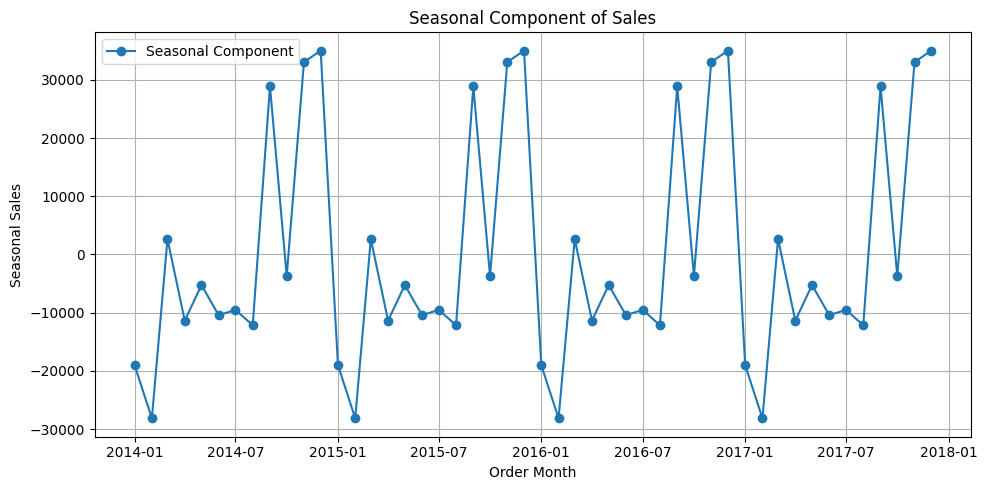

In [23]:
# Plot only the seasonal graph to see in more details
plt.figure(figsize=(10, 5))
plt.plot(result.seasonal, marker='o', label='Seasonal Component')
plt.title('Seasonal Component of Sales')
plt.xlabel('Order Month')
plt.ylabel('Seasonal Sales')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

**Insights**

Here we can observed the seasonal pattern in more detail to see clearly the timestamp of the seasonal pattern. As we can observe here, the pattern start slow in the beginning of each year and starting to ramp up until the between the month of April to August where it stay somewhat consistent. September, November and December shows the high and significant peak showing the majority of sales is being made during these months.

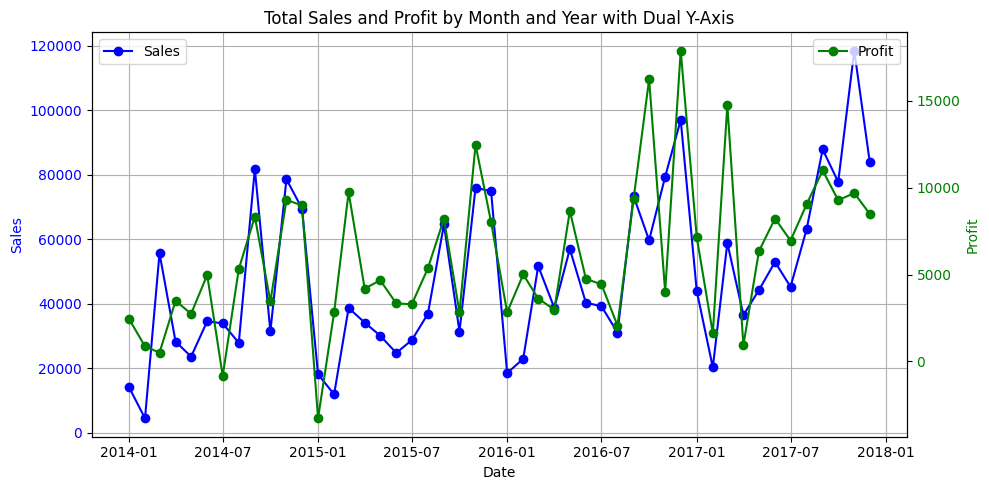

In [24]:
# Group by Year and Month, then Sum Sales and Profit
sales_by_month = data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a Date for Plotting
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Sales on primary y-axis
ax1.plot(sales_by_month['Date'], sales_by_month['Sales'], marker='o', label='Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(sales_by_month['Date'], sales_by_month['Profit'], marker='o', label='Profit', color='green')
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the plot
plt.title('Total Sales and Profit by Month and Year with Dual Y-Axis')
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Insights**

Here we observed the line for sales and profit on the same graph to compare the pattern of sales and profit. As we can observe, profit generally moves in the same direction as sales, though not always proportionally. Both the sales and profit shows a general upward trend from 2014 to 2018, with some seasonal fluctuations. There appear to be regular peaks and troughs, sales often dip in January and rise later in the year.

**Category Analysis**

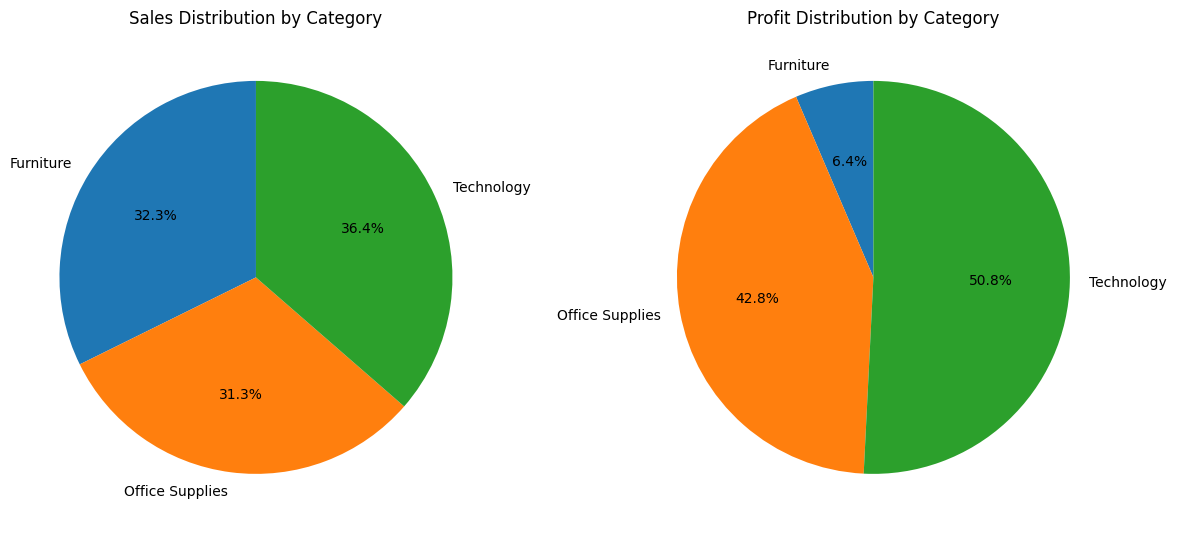

In [29]:
# Group by Category and Sum Sales and Profit
category_summary = data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create Pie Charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Pie Chart for Sales
axs[0].pie(category_summary['Sales'], labels=category_summary['Category'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Sales Distribution by Category')

# Plot Pie Chart for Profit
axs[1].pie(category_summary['Profit'], labels=category_summary['Category'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Profit Distribution by Category')

# Show the plots
plt.tight_layout()
plt.show()

**Insights**

Here we can observed the main three category that generate the income for the store. As we can see, the sales are distributed in similar proportion for each category with deviation of maximum of 5.1%. All three categories are generating sales of around 30% to the total sales. However as we can see, on the profit pie chart, the furniture category provides the least profit of 6.4% ratio even though it generates 32.3% of sales ratio. This shows that the furniture category are not generating profit well compared to the office supplies and technology category. Here we can observed that the best sales and profit generating category is the technology.

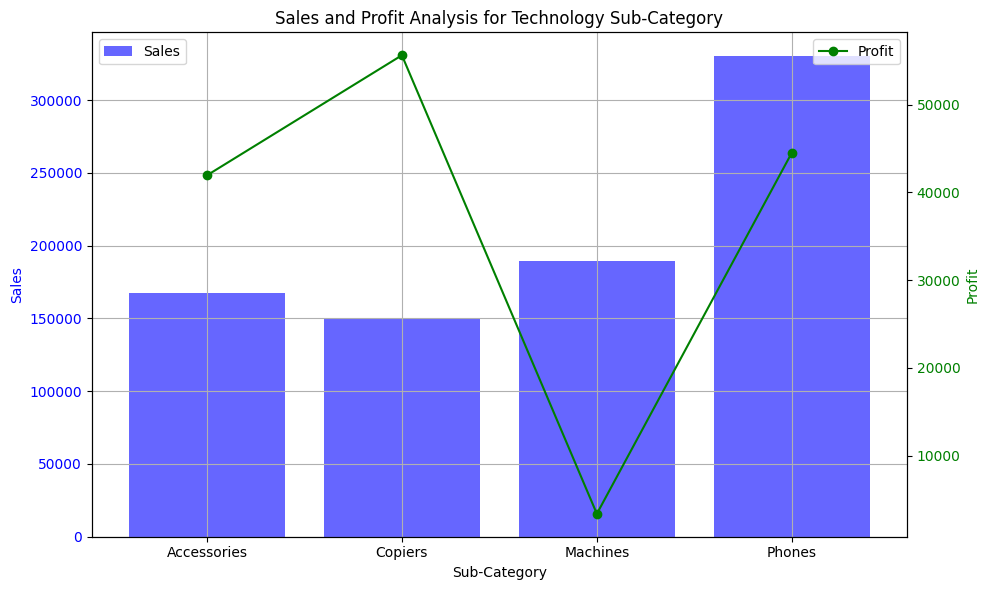

In [30]:
# Filter for Technology Category
tech_data = data[data['Category'] == 'Technology']

# Group by Subcategory and Sum Sales and Profit
tech_summary = tech_data.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a Bar Chart for Sales and Profit in Technology
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales
ax1.bar(tech_summary['Sub-Category'], tech_summary['Sales'], label='Sales', color='blue', alpha=0.6)
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(tech_summary['Sub-Category'], tech_summary['Profit'], marker='o', label='Profit', color='green')
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the plot
plt.title('Sales and Profit Analysis for Technology Sub-Category')
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Insights**

Here we dive deeper into the technology category to see in more details of the products. As we can see, phones are generating the most sales followed by machine and accessories while copiers comes in last. However the highest profit is generated by copiers followed by phones and accessories. This shows a potential of increasing profit by focusing in expanding the sales of copiers. However, copiers are not an item that is used by general public as much as phones.

**Summary**

To summarize all the insights from the visualization that we made, the overall sales trend shows consistent year-over-year growth, indicating increasing customer demand and effective business operations. This upward trend accelerates slightly toward 2017, suggesting that growth is gaining momentum.

Seasonality is a clear feature of the sales pattern, with regular peaks and troughs repeating annually. Sales tend to ramp up during mid-year (April–August) and peak significantly in September, November, and December. These periods likely correspond to key shopping seasons, such as back-to-school, Black Friday, holiday shopping, or fiscal year-end purchasing by corporate customers. This predictable seasonal behavior provides an opportunity to align marketing, inventory, and staffing plans with high-demand periods.

When breaking down sales and profitability by category, the analysis shows that although all three main categories — Furniture, Office Supplies, and Technology — contribute roughly equally to total sales, profitability varies greatly. The Technology category emerges as the most profitable, while Furniture underperforms, generating only 6.4% of total profit despite accounting for 32.3% of sales. This discrepancy suggests that Furniture’s margins are thin or costs are high, reducing its contribution to overall profitability.

Within the Technology category, Phones dominate sales, but Copiers generate the highest profit margin, indicating an opportunity to promote high-value items despite lower sales volume. Copiers, however, cater to a more niche market, and expanding their sales would require targeted efforts toward corporate or institutional customers rather than the general public.

# **Recommendation**

To further enhance business performance, it is recommended to focus marketing and promotional campaigns on the peak months of September, November, and December to fully capitalize on the strong seasonal demand observed during these periods. At the same time, strategies should be developed to boost sales during the traditionally low-performing months, such as offering targeted promotions or discounts, in order to smooth out cash flow and maintain steady revenue throughout the year. The Furniture category warrants a thorough review to improve its profitability; this could involve analyzing costs, revisiting pricing strategies, introducing higher-margin products, renegotiating supplier contracts, or phasing out underperforming SKUs. In contrast, the Technology category shows strong potential, particularly in Phones and Copiers, and efforts should be expanded to promote these products further. For Copiers, in particular, targeted B2B marketing campaigns aimed at corporate and institutional clients could help tap into their high-profit potential. Finally, inventory management and staffing plans should be aligned with the clear seasonal patterns identified in the sales data, ensuring operational efficiency and optimal customer service during periods of peak demand.

# **Conclusion**

The analysis of Superstore’s sales data from 2014 to 2017 highlights a business that is not only growing but doing so in a predictable and structured way. The overall trend in sales has been steadily increasing, with growth even accelerating toward the later years, which indicates strong market demand, effective business strategies, and the potential for further expansion if managed strategically. Seasonal patterns are clearly evident, with consistent peaks in sales occurring during specific months of the year notably September, November, and December suggesting that customer behavior is strongly influenced by predictable factors such as holiday shopping periods, year-end corporate spending, and possibly back-to-school seasons. These seasonal peaks are complemented by periods of lower activity in the earlier months of the year, which highlights the need for strategies aimed at leveling demand throughout the calendar year to avoid over-reliance on peak months.

The breakdown of sales and profitability by product category reveals important nuances in business performance. Although Furniture, Office Supplies, and Technology each contribute a similar proportion of overall sales, their profitability is not equal. Technology is the clear leader in profitability, while Furniture lags significantly, suggesting inefficiencies or low margins in this category that should be addressed. A deeper look into the Technology category also uncovers specific product-level insights: while Phones dominate sales, Copiers deliver the highest profit margins, representing a niche but highly lucrative opportunity, particularly in corporate or institutional markets. This balance between high-volume, moderate-margin products and lower-volume, high-margin items offers the business an opportunity to fine-tune its product and marketing strategies for maximum return.

Overall, the decomposition of the sales time series shows that the business is healthy and its performance can be largely explained by a strong upward trend and stable seasonal factors. The residuals are small and randomly distributed, indicating no major unexplained variance and suggesting that the underlying data is robust and reliable. However, the clear seasonality and the disparity in category-level profitability also highlight areas where management action can deliver meaningful improvements. By aligning operational planning such as inventory, staffing, and marketing campaigns with seasonal demand, improving the cost structure and pricing in underperforming categories, and doubling down on high-margin, high-potential products, the Superstore is well-positioned to continue its growth trajectory while improving efficiency and profitability. These findings should serve as a roadmap for both short-term tactical decisions and longer-term strategic planning to ensure the business remains competitive and resilient in an evolving retail landscape.

